In [2]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

import matplotlib.pyplot as plt
import pandas as pd
from src.model import BasicModel

plt.rcParams['figure.figsize'] = 15.7,13.27
plt.rcParams['font.family'] = 'AppleGothic'

class LEARN_INFO:
    def __init__(self, name, columns, is_contain_cluster_label=False, matching_type="general", jump=3):
        self.name = name
        self.columns = columns
        self.is_label = is_contain_cluster_label
        self.matching = matching_type
        self.jump = jump
    

# INPUT_REPORT_SIMULATION = [
#     LEARN_INFO(name="univariate", columns=['energy (kw 15min)'], is_contain_cluster_label=False),
#     LEARN_INFO(name="with cluster label", columns=['energy (kw 15min)'], is_contain_cluster_label=True),
# ]

DEFAULT_COLUMNS = [
    'energy (kw 15min)',
    ['week sin',
    'week cos'],
    ['year sin',
    'year cos'],
    'season idx',
    'weather idx',
    'avg ta',
    'avg rhm'
]

In [6]:
_ = {
    "univariate": ['energy (kw 15min)'],
#     "multivariate (week)": [
#         'energy (kw 15min)',
#         'week sin',
#         'week cos'
#     ],
#     "multivariate (year)": [
#         'energy (kw 15min)',
#         'year sin',
#         'year cos',
#     ],
#     "multivariate (weather)": [
#         'energy (kw 15min)',
#         'weather idx'
#     ],
#     "multivariate (avg ta)": [
#         'energy (kw 15min)',
#         'avg ta'
#     ],
#     "multivariate (avg rhm)": [
#         'energy (kw 15min)',
#         'avg rhm'
#     ],
#     "multivariate (season)": [
#         'energy (kw 15min)',
#         'season idx'
#     ]
}

# Input Report Simulation
IRS = []

# for key in _.keys():
#     IRS.append(
#         LEARN_INFO(name="{} / with cluster".format(key), 
#                    columns=_[key], 
#                    is_contain_cluster_label=True),
#     )
    
    
for key in _.keys():
    IRS.append(
        LEARN_INFO(name=key, 
                   columns=_[key], 
                   is_contain_cluster_label=False),
    )

# Training Model Array 
TMA = []

is_switch = True

for _ in IRS:
    bm = BasicModel(name=_.name,
                   columns=_.columns,
                   is_contain_cluster_label=_.is_label,
                   is_switch=is_switch,
                   matching_type=_.matching)
    
    bm.set_window(OUT_STEPS=3)
    bm.set_model()
    print(bm)
    bm.training(epochs=50)
    
    bm.set_predict(is_reshape=True)
    bm.set_predict(is_reshape=True, is_val_datas=True)
    
    TMA.append(bm)
    
test_evaluate_df = pd.DataFrame();
val_evaluate_df = pd.DataFrame();

for _ in TMA:
    test_evaluate_df = test_evaluate_df.append(_.statistic(), ignore_index=True)
    val_evaluate_df = val_evaluate_df.append(_.statistic(is_val_datas=True), ignore_index=True)
    
test_evaluate_df.index = [_.name for _ in TMA]
val_evaluate_df.index = [_.name for _ in TMA]

###### [Notice] (univariate) set predict (validation) info start ###### 

0 / 171
50 / 171
100 / 171
150 / 171
171 / 171 complete.

###### [Notice] set predict info success ###### 



In [7]:
pr_test = TMA[0]
pr_test

###### Basic Model Information ######
 - name : univariate
 - columns : energy (kw 15min)
 - model type : Single Step
 - datas : 
                     energy (kw 15min)
Date Time                             
2017-01-01 00:00:00              15250
2017-01-01 01:00:00              14000
2017-01-01 02:00:00              14750
2017-01-01 03:00:00              29500
2017-01-01 04:00:00              15750
 - norm_datas : 
                     energy (kw 15min)
Date Time                             
2017-01-01 00:00:00          -0.719354
2017-01-01 01:00:00          -0.811090
2017-01-01 02:00:00          -0.756048
2017-01-01 03:00:00           0.326432
2017-01-01 04:00:00          -0.682660

In [36]:
p_list = pr_test.predicts_list.copy()

In [37]:
o_list = pr_test.norm_datas['test'].values.reshape(-1,24)[:,3:].copy()

In [38]:
test_p = p_list[0]

In [39]:
test_o = o_list[0]

In [45]:
for idx,o in enumerate(o_list):
    print("검출되어야 할 개수 : {}".format(len(o.flatten())))

검출되어야 할 개수 : 21
검출되어야 할 개수 : 21
검출되어야 할 개수 : 21
검출되어야 할 개수 : 21
검출되어야 할 개수 : 21
검출되어야 할 개수 : 21
검출되어야 할 개수 : 21
검출되어야 할 개수 : 21
검출되어야 할 개수 : 21
검출되어야 할 개수 : 21
검출되어야 할 개수 : 21
검출되어야 할 개수 : 21
검출되어야 할 개수 : 21
검출되어야 할 개수 : 21
검출되어야 할 개수 : 21
검출되어야 할 개수 : 21
검출되어야 할 개수 : 21
검출되어야 할 개수 : 21
검출되어야 할 개수 : 21
검출되어야 할 개수 : 21
검출되어야 할 개수 : 21
검출되어야 할 개수 : 21
검출되어야 할 개수 : 21
검출되어야 할 개수 : 21
검출되어야 할 개수 : 21
검출되어야 할 개수 : 21
검출되어야 할 개수 : 21
검출되어야 할 개수 : 21
검출되어야 할 개수 : 21
검출되어야 할 개수 : 21
검출되어야 할 개수 : 21
검출되어야 할 개수 : 21
검출되어야 할 개수 : 21
검출되어야 할 개수 : 21
검출되어야 할 개수 : 21
검출되어야 할 개수 : 21
검출되어야 할 개수 : 21
검출되어야 할 개수 : 21
검출되어야 할 개수 : 21
검출되어야 할 개수 : 21
검출되어야 할 개수 : 21
검출되어야 할 개수 : 21
검출되어야 할 개수 : 21
검출되어야 할 개수 : 21
검출되어야 할 개수 : 21
검출되어야 할 개수 : 21
검출되어야 할 개수 : 21
검출되어야 할 개수 : 21
검출되어야 할 개수 : 21
검출되어야 할 개수 : 21
검출되어야 할 개수 : 21
검출되어야 할 개수 : 21
검출되어야 할 개수 : 21
검출되어야 할 개수 : 21
검출되어야 할 개수 : 21
검출되어야 할 개수 : 21
검출되어야 할 개수 : 21
검출되어야 할 개수 : 21
검출되어야 할 개수 : 21
검출되어야 할 개수 : 21
검출되어야 할 개수 : 21
검출되어야 할 개수 : 21
검출되어야 할 

In [72]:
test_p = p_list[0]
print("검출되어야 할 개수 : {}\n".format(len(test_o)))
threshold = 40
conf_threshold = 25
detect_df = pd.DataFrame(columns=['time', 'Confidense', 'Result'])
for idx,o in enumerate(test_o):
    p = test_p[idx]
    th = abs(o) * threshold / 100
    conf_th = abs(o) * conf_threshold / 100
    err = abs(abs(o) - abs(p))
    
    result = "TP" if err < conf_th else "FP" if err < th else "No"
    
    print("## info ##")
    print("original: {}, predict: {}".format(p, o))
    print("threshold : err < {}, err : {}".format(th, err))
    print("result : {}".format(result))
    
    detect_df = detect_df.append({
        "time": idx + 1,
        "Confidense": "{}%".format(
            round((abs(o) - err) / abs(o) * 100, 2)
        ),
        "Result": result
    }, ignore_index=True)
    
    print()

검출되어야 할 개수 : 21

## info ##
original: -1.0076878070831299, predict: -1.3798505065638196
threshold : err < 0.5519402026255278, err : 0.3721626994806897
result : FP

## info ##
original: -0.9588831663131714, predict: -1.3981976328551382
threshold : err < 0.5592790531420553, err : 0.4393144665419668
result : FP

## info ##
original: -1.0119035243988037, predict: -1.3248091276898641
threshold : err < 0.5299236510759456, err : 0.31290560329106043
result : TP

## info ##
original: -0.857227087020874, predict: -1.3981976328551382
threshold : err < 0.5592790531420553, err : 0.5409705458342642
result : FP

## info ##
original: -1.061845302581787, predict: -1.3248091276898641
threshold : err < 0.5299236510759456, err : 0.26296382510807703
result : TP

## info ##
original: -0.8663457632064819, predict: -1.3064620013985455
threshold : err < 0.5225848005594181, err : 0.4401162381920636
result : FP

## info ##
original: -0.8912578225135803, predict: -1.3248091276898641
threshold : err < 0.5299236510

In [73]:
detect_df

,time,Confidense,Result
0,1,73.03%,FP
1,2,68.58%,FP
2,3,76.38%,TP
3,4,61.31%,FP
4,5,80.15%,TP
5,6,66.31%,FP
6,7,67.27%,FP
7,8,82.53%,TP
8,9,95.48%,TP
9,10,19.0%,No


In [75]:
len(detect_df)

21

In [98]:
detect_size = len(detect_df)
pr_check_df = detect_df[(
    detect_df['Result'] == "TP"
) | (
    detect_df['Result'] == "FP"    
)]
pr_df = pd.DataFrame(columns=['Time', 'Confidense', 'TP or FP',
                             '누적 TP', '누적 FP', 'Precision', 'Recall',
                             "Precision Value", "Recall Value"])

detect = 0
tp_detect = 0
fp_detect = 0
for idx in pr_check_df.index:
    is_tp = pr_check_df.loc[idx]['Result'] == "TP"
    if is_tp:
        tp_detect += 1
    else:
        fp_detect += 1
    detect += 1
    
    pr_df = pr_df.append({
        "Time": idx,
        "Confidense": pr_check_df.loc[idx]['Confidense'],
        "TP or FP": pr_check_df.loc[idx]['Result'],
        "누적 TP": tp_detect,
        "누적 FP": fp_detect,
        "Precision": "{}/{}={}".format(
            tp_detect,
            detect,
            round(tp_detect / detect, 2)
        ),
        "Recall": "{}/{}={}".format(
            tp_detect,
            detect_size,
            round(tp_detect / detect_size, 2)
        ),
        "Precision Value": round(tp_detect / detect, 2),
        "Recall Value": round(tp_detect / detect_size, 2)
    }, ignore_index=True)

In [99]:
pr_df

,Time,Confidense,TP or FP,누적 TP,누적 FP,Precision,Recall,Precision Value,Recall Value
0,0,73.03%,FP,0,1,0/1=0.0,0/21=0.0,0.00,0.00
1,1,68.58%,FP,0,2,0/2=0.0,0/21=0.0,0.00,0.00
2,2,76.38%,TP,1,2,1/3=0.33,1/21=0.05,0.33,0.05
3,3,61.31%,FP,1,3,1/4=0.25,1/21=0.05,0.25,0.05
4,4,80.15%,TP,2,3,2/5=0.4,2/21=0.1,0.40,0.10
5,5,66.31%,FP,2,4,2/6=0.33,2/21=0.1,0.33,0.10
6,6,67.27%,FP,2,5,2/7=0.29,2/21=0.1,0.29,0.10
7,7,82.53%,TP,3,5,3/8=0.38,3/21=0.14,0.38,0.14
8,8,95.48%,TP,4,5,4/9=0.44,4/21=0.19,0.44,0.19
9,11,94.82%,TP,5,5,5/10=0.5,5/21=0.24,0.50,0.24


In [114]:
x = pr_df['Recall Value'].values
y = pr_df['Precision Value'].values
print(x)
print(y)

[0.   0.   0.05 0.05 0.1  0.1  0.1  0.14 0.19 0.24 0.24 0.29 0.29 0.29
 0.29 0.29 0.33 0.38]
[0.   0.   0.33 0.25 0.4  0.33 0.29 0.38 0.44 0.5  0.45 0.5  0.46 0.43
 0.4  0.38 0.41 0.44]


In [ ]:
curve_x = list()
curve_y = list()

for idx, _ in 

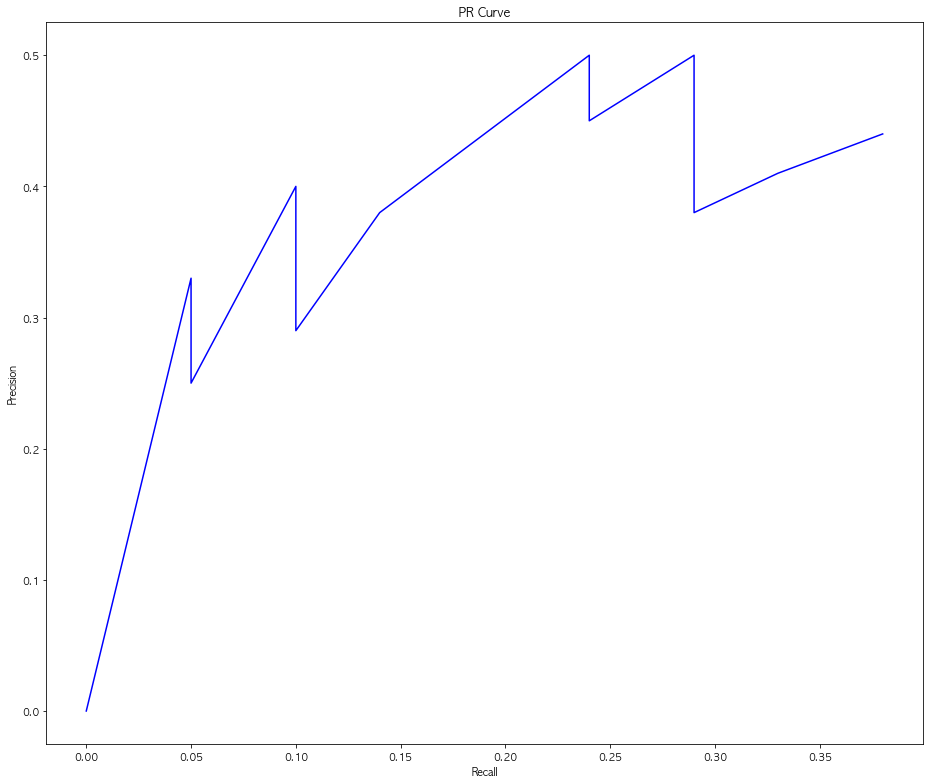

In [107]:
import matplotlib.pyplot as plt

plt.plot(x,y, "b")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("PR Curve")
plt.show()

In [141]:
import numpy as np
from scipy.interpolate import interp1d


# linear
# nearest

fl = interp1d(x,y,kind='next')
fl

In [146]:
xint = np.linspace(x.min(), x.max(), 1000)
yintl = fl(xint)

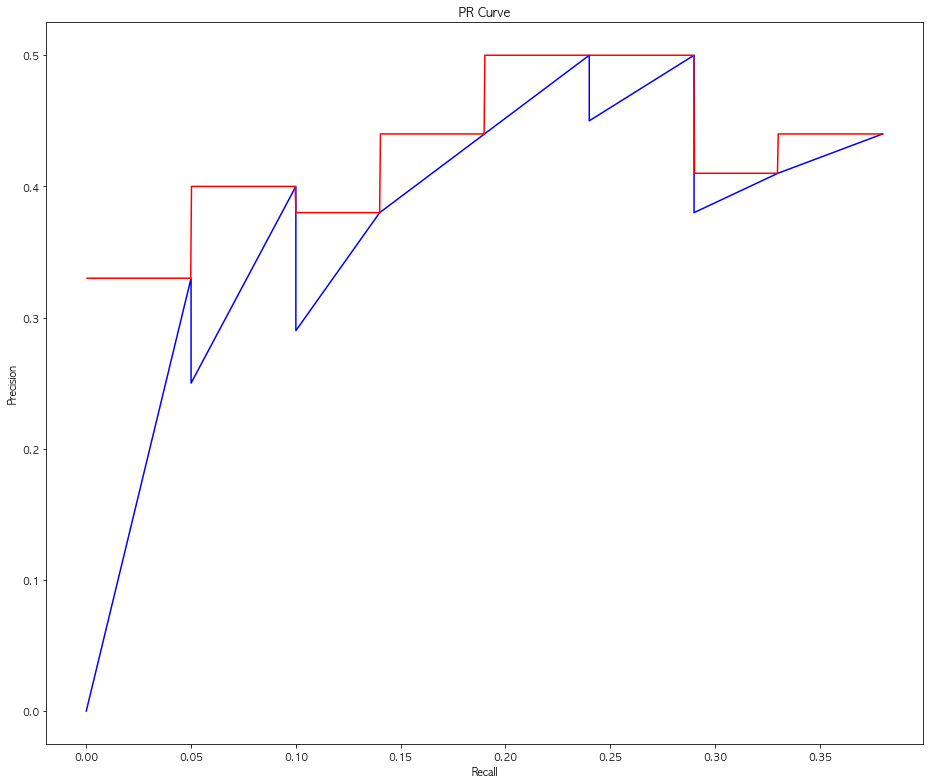

In [153]:
import matplotlib.pyplot as plt

plt.plot(x,y, "b")
plt.plot(xint[1:], yintl[1:], 'r')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("PR Curve")
plt.show()

In [166]:
xint[0:133]

array([0.        , 0.00038038, 0.00076076, 0.00114114, 0.00152152,
       0.0019019 , 0.00228228, 0.00266266, 0.00304304, 0.00342342,
       0.0038038 , 0.00418418, 0.00456456, 0.00494494, 0.00532533,
       0.00570571, 0.00608609, 0.00646647, 0.00684685, 0.00722723,
       0.00760761, 0.00798799, 0.00836837, 0.00874875, 0.00912913,
       0.00950951, 0.00988989, 0.01027027, 0.01065065, 0.01103103,
       0.01141141, 0.01179179, 0.01217217, 0.01255255, 0.01293293,
       0.01331331, 0.01369369, 0.01407407, 0.01445445, 0.01483483,
       0.01521522, 0.0155956 , 0.01597598, 0.01635636, 0.01673674,
       0.01711712, 0.0174975 , 0.01787788, 0.01825826, 0.01863864,
       0.01901902, 0.0193994 , 0.01977978, 0.02016016, 0.02054054,
       0.02092092, 0.0213013 , 0.02168168, 0.02206206, 0.02244244,
       0.02282282, 0.0232032 , 0.02358358, 0.02396396, 0.02434434,
       0.02472472, 0.02510511, 0.02548549, 0.02586587, 0.02624625,
       0.02662663, 0.02700701, 0.02738739, 0.02776777, 0.02814

In [164]:
yintl[0:132]

array([0.  , 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33,
       0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33,
       0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33,
       0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33,
       0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33,
       0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33,
       0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33,
       0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33,
       0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33,
       0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33,
       0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33,
       0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33])

In [171]:
# xint, yintl
check_x = xint.copy()
check_y = yintl.copy()
ap = 0
x_point = check_x[0]
y_point = check_y[0]
for idx, _ in enumerate(check_y):
    if y_point != _:
        area_x_start = x_point
        area_x_end = check_x[idx - 1]
            
        x = area_x_end - area_x_start #width
        ap += (x * y_point)
        
        print("Before Change: {}".format(y_point))
        x_point = check_x[idx]
        y_point = _
        print("After Change: {}".format(y_point))

Before Change: 0.0
After Change: 0.33
Before Change: 0.33
After Change: 0.4
Before Change: 0.4
After Change: 0.38
Before Change: 0.38
After Change: 0.44
Before Change: 0.44
After Change: 0.5
Before Change: 0.5
After Change: 0.41
Before Change: 0.41
After Change: 0.44


In [172]:
ap

0.13908228228228228

In [150]:
ap = 0
point_list = list(set(yintl))
for idx,_ in enumerate(point_list):
    if (idx + 1) >= len(point_list):
        break
        
    area_start = point_list[idx]
    area_end = point_list[idx - 1]
    
    x = area_end - area_start
    

[0.0, 0.4, 0.38, 0.33, 0.44, 0.5, 0.41]